# Loan Data from Prosper: Communicate Findings
## by Marc Campmany

## Investigation Overview

> In this project the main goal has been to analyze the features related mainly to the Borrower's APR (annual interest rate charged). The variables studied have been the Original Loan Amount, Borrower's Prosper Rating, Loan Term, Borrower's Income Range, Employment Status, Occupation and aim of the loan.

## Dataset Overview

> The original data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. After cleaning operations, the dataset studied contains 83.968 unique loans with 15 related features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('LoanData_cleaned.csv')

In [8]:
rate_order = ['HR','E','D','C','B','A','AA']
cat_var = pd.api.types.CategoricalDtype(ordered = True, categories = rate_order)
loans['ProsperRating'] = loans['ProsperRating'].astype(cat_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
emp_var = pd.api.types.CategoricalDtype(ordered = True, categories = emp_order)
loans['EmploymentStatus'] = loans['EmploymentStatus'].astype(emp_var)

inc_order = [ 'Not employed','$0', '$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+',]
inc_var = pd.api.types.CategoricalDtype(ordered = True, categories = inc_order)
loans['IncomeRange'] = loans['IncomeRange'].astype(inc_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of loans listed per year and month

> 2013 was the year where more loans were requested. And normally the winter months have higher nº of loans than summer periods.

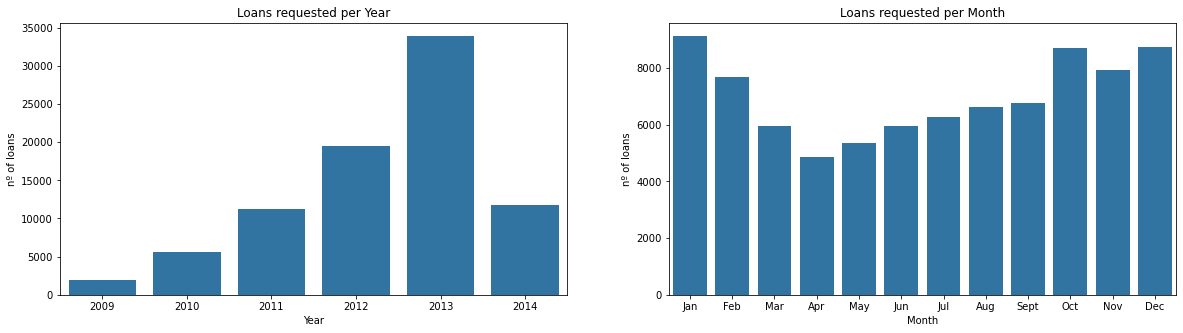

In [9]:
loans['LoanOriginationDate']= pd.to_datetime(loans['LoanOriginationDate'])
base_color = sb.color_palette()[0]
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1) 
sb.countplot(x=loans.LoanOriginationDate.dt.year, data=loans, color=base_color)
plt.title('Loans requested per Year')
plt.xlabel('Year')
plt.ylabel('nº of loans')


plt.subplot(1, 2, 2) 
sb.countplot(x=loans.LoanOriginationDate.dt.month, data=loans, color=base_color)
plt.title('Loans requested per Month')
plt.xlabel('Month')
plt.ylabel('nº of loans')
plt.xticks(np.arange(0,12,1),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']);

## Distribution of Borrower APRs

> The distribution of APRs looks multimodal with a peak centered at 0.14, another peak centered at 0.26 and a large one at 0.31. Only very few loans have APR greater than 0.35.

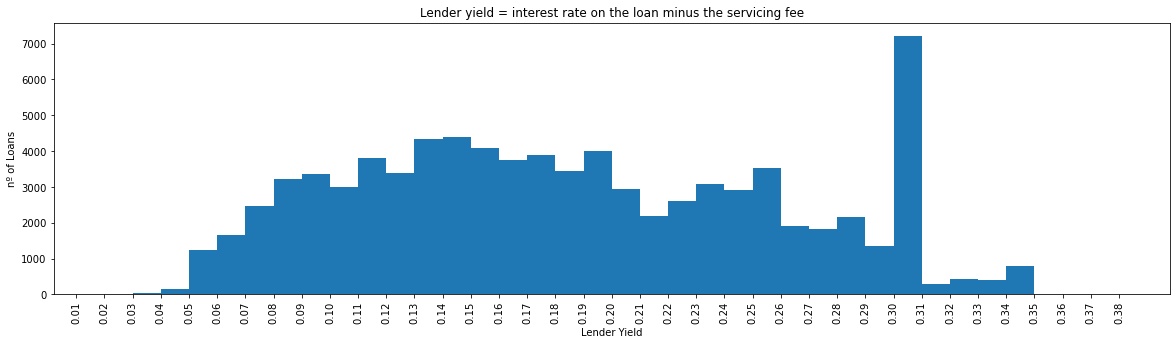

In [10]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [20, 5]) 

bins = np.arange(0.02, loans.LenderYield.max()+0.05, 0.01)
plt.hist(data = loans, x = 'LenderYield', bins = bins);
plt.xticks(np.arange(0.01,loans.LenderYield.max()+0.05, 0.01), rotation=90)
plt.title('Lender yield = interest rate on the loan minus the servicing fee')
plt.ylabel('nº of Loans')
plt.xlabel('Lender Yield');

## Distribution of Borrower's Income Ranges

> Regardings the borrower's income we can see that the majority of Loans have been requested by 25k-75k incomes.

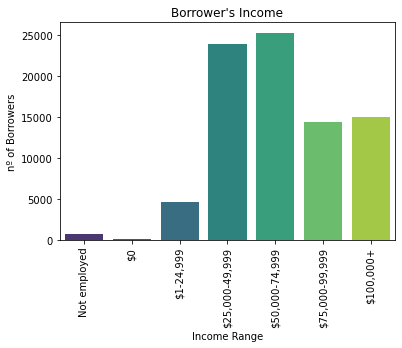

In [12]:
plt.subplot(1,3,3)
sb.countplot(data = loans, x = 'IncomeRange', palette='viridis')
plt.xticks(rotation=90);
plt.title('Borrower\'s Income')
plt.ylabel('nº of Borrowers')
plt.xlabel('Income Range');

## Distribution of Debt to Income Ratio

> Distribution has unimodal shape peaking aroung 0.18 with a large peak around 0.25. This indicates most people have 1:4 ratio of debt to Income which would be a correct proportion.

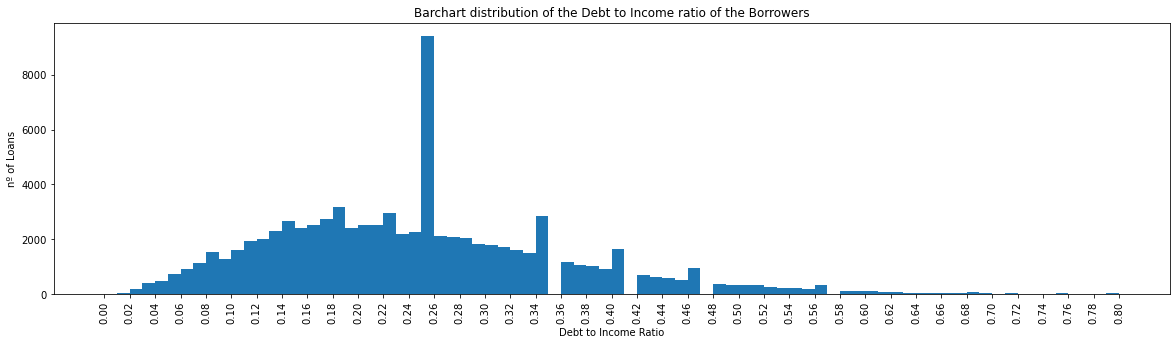

In [13]:
# distribution of DebtToIncomeRatio 
plt.figure(figsize = [20, 5])
bins = np.arange(0,0.81, 0.01)
plt.hist(data = loans, x = 'DebtToIncomeRatio', bins = bins)
plt.xticks(np.arange(0, 0.81, 0.02), rotation=90)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('nº of Loans')
plt.title('Barchart distribution of the Debt to Income ratio of the Borrowers');

## Bivariate exploration: Borrower APR and Loan Amount vs categorical variables (Term, Rating, Employment, Income Range)

> We can see that the Loans with more Terms and the best ranked (AA) are the ones that are charged a lower interest rate (APR). Also when the borrower is employed/full-time the APR is also lower. Regarding the IncomeRange is easy to see that the higher the income range of the borrower, the lower the APR.
> Loan Amounts show that are related to terms where higher loans require higher terms. We can also observe that, understandably, borrowers with higher incomes or employed (variables= employed, self-employed, full-time) acquire higher Loans.

<Figure size 720x720 with 0 Axes>

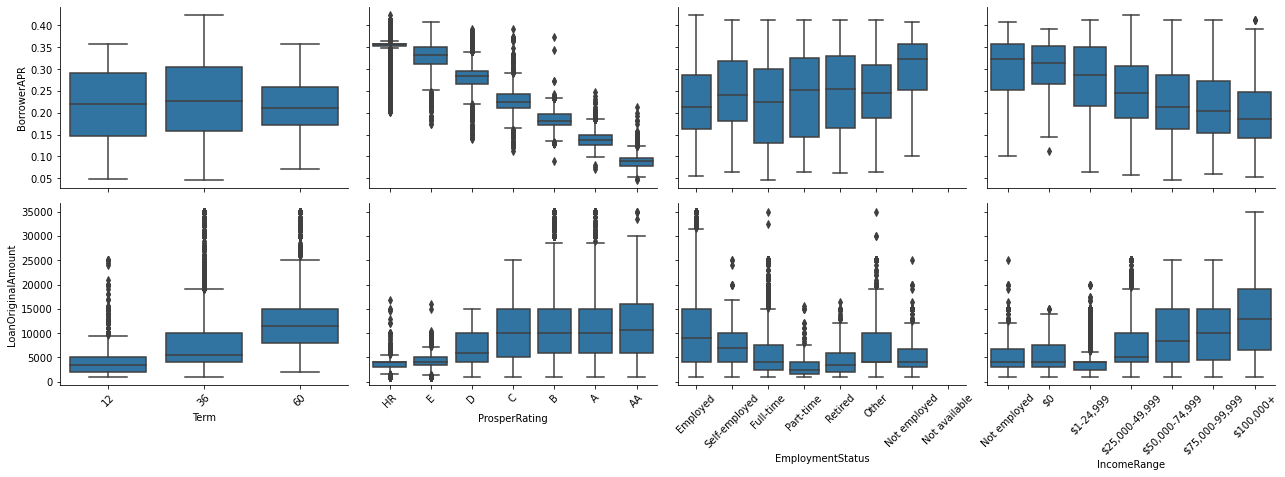

In [16]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loans, y_vars= ['BorrowerAPR', 'LoanOriginalAmount'], x_vars = ['Term','ProsperRating', 'EmploymentStatus', 'IncomeRange'],
                height= 3, aspect = 1.5)
for axis in g.axes.flatten():
    axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
    
g.map(boxgrid)
plt.show();

## Borrower APR vs Loan Amount

> We can see the negative correlation between the Borrowers interest rate and the amount of the Loan requested. As the amount is higher, the interests decrease. 

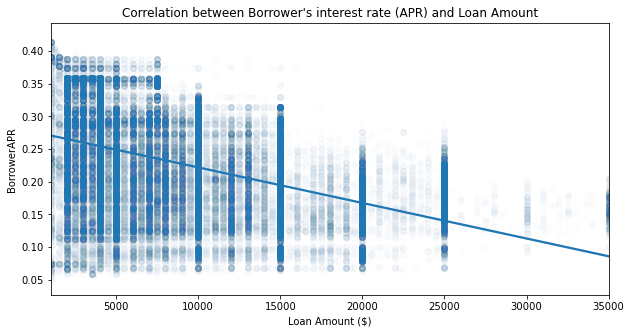

In [17]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.regplot(data = loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01}, x_jitter=0.3)
plt.title('Correlation between Borrower\'s interest rate (APR) and Loan Amount')
plt.xlabel('Loan Amount ($)');

## Rating Effect on relationship between APR and Loan Amount

> Following with the analysis of the Borrower's APR vs the Loan Amount where we found a negative correlation, adding in the Prosper Rating confirms that this is a powerful combination given that the higher the rating the lower the interest and each of the categories is clearly plotted.

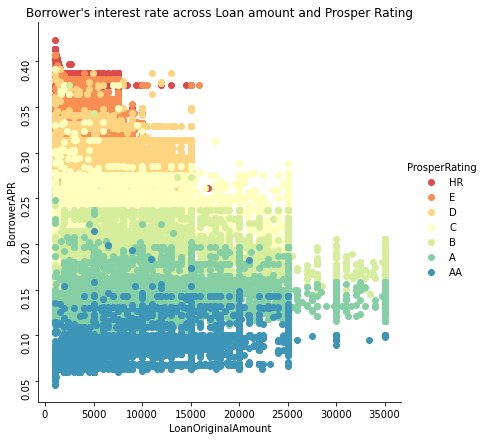

In [18]:
g = sb.FacetGrid(data = loans, hue = 'ProsperRating', height=6, palette='Spectral');
g.map(plt.scatter, 'LoanOriginalAmount','BorrowerAPR' );
plt.title('Borrower\'s interest rate across Loan amount and Prosper Rating');
plt.ylabel('BorrowerAPR');
plt.yticks(rotation=90);
g.add_legend();
plt.show();

> We can see that the relationship BorrowerAPR vs Loan Amount goes from negative on ratings HR- B to slighly positive on ratings A and AA.

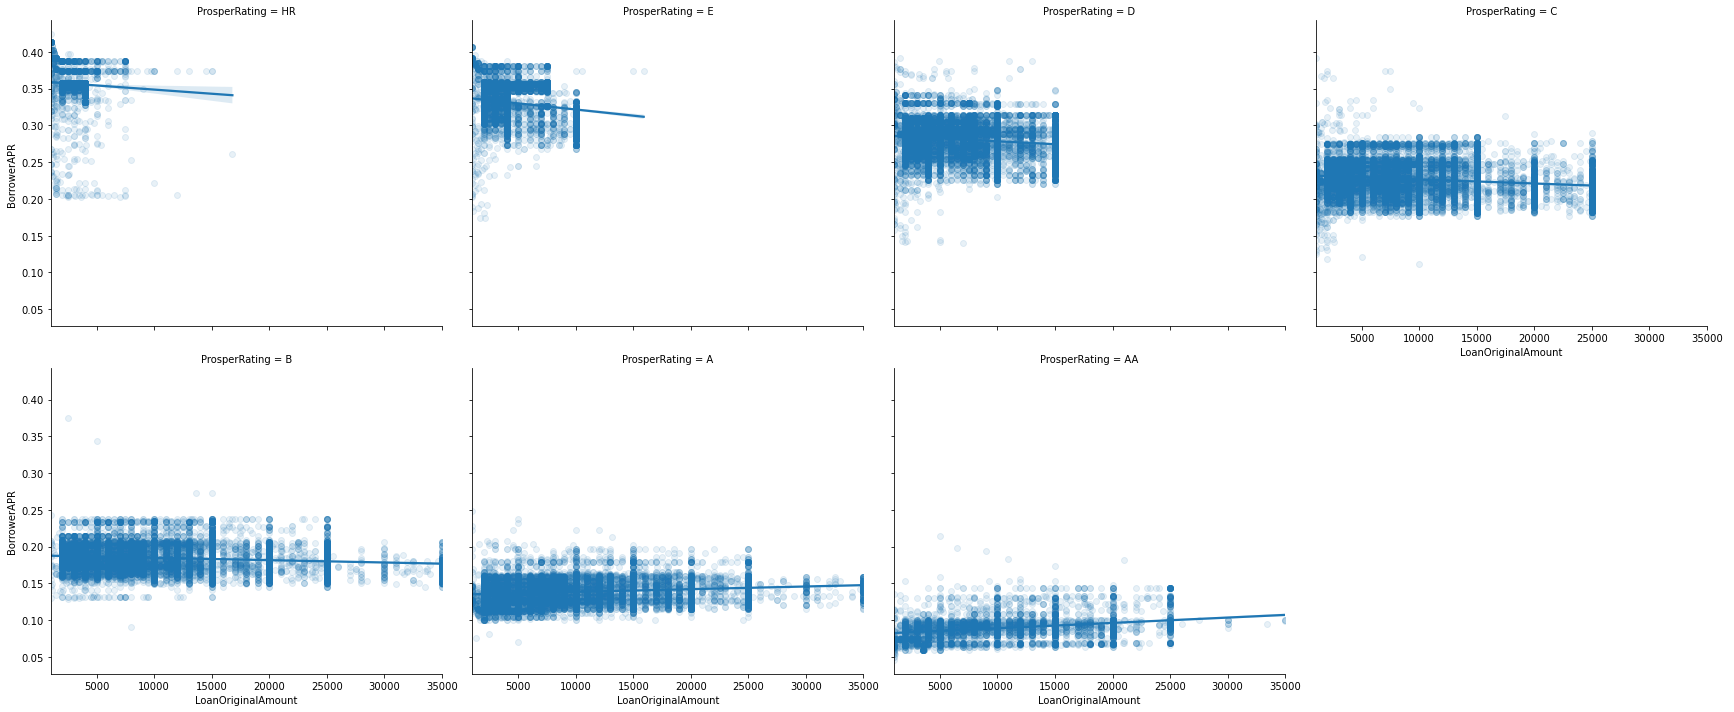

In [19]:
g=sb.FacetGrid(data=loans, aspect=1.2, height=5, col='ProsperRating', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

## Loan Amount vs Rating vs Term

> The higher loans equaled higher Terms. Now, it can also be confirmed that this pattern is extensible to all the Prosper Ratings.

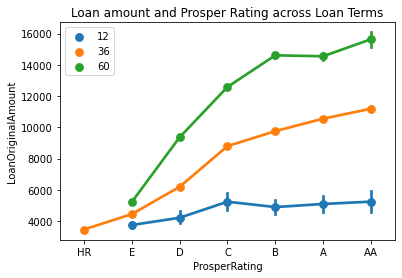

In [21]:
sb.pointplot(data=loans,x='ProsperRating',y='LoanOriginalAmount', hue='Term' );
plt.title( 'Loan amount and Prosper Rating across Loan Terms');
# plt.ylabel('BorrowerAPR')
# plt.yticks(rotation=90)
plt.legend()

## Borrower APR vs Rating vs Term

> We can see that the better the rating the less interest rate. And adding in the Loan Terms we can see that as the Loan Rating gets better, the pattern is that the Terms increase. This is probably be due to the increase of the Loan Amount.

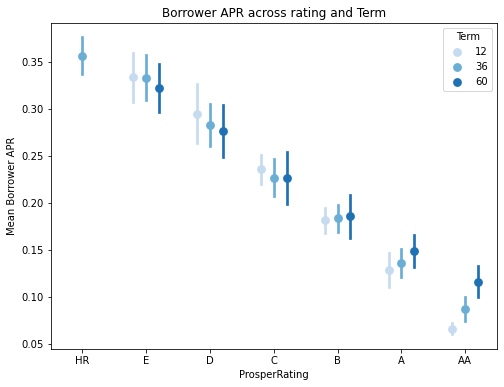

In [22]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x = 'ProsperRating', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and Term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

## Loan Amount vs Rating vs Borrower APR

> Comparing the same variables as previously but adding the income range to the plot, we can see that per each Rating the Loan amount requested is proportional to the income range of the borrower (higher income range, higher loan amount requested).

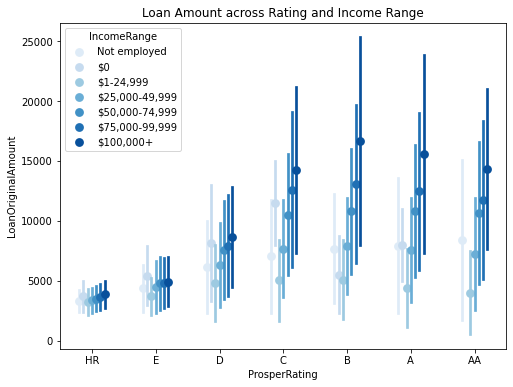

In [24]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Loan Amount across Rating and Income Range')
# plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

## Conclusions

- Extended the borrower APR vs loan amount by adding in the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan amount goes from negative on ratings HR-B to slighly positive relationship on ratings A and AA.
- We can also see that the better the Prosper Rating the less Interest Rate is charged. And adding the Loan Terms, we can see that as the Loan Rating gets better, the pattern is that the Terms increase. This is probably also due to the increase of the Loan Amount.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!